<a href="https://colab.research.google.com/github/MunJinSeo/E2E_ML_DiabetesClassifier/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5(AAI107)_Assignment1_%EC%84%9C%EB%AC%B8%EC%A7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### IMPORTANT

Student Name (ENG): MunJin, Seo

Student Name (KOR):서문진

Student Department (ENG): Big Data Convergence Department

Student ID: 2020511021

Consent that you will not plagiarise (yes/no): yes

In [2]:
import numpy as np
np.random.seed(20220324)

import os

import hashlib
import urllib.request

import pandas as pd

#### Include any librarys you need to import here ###
# Scikit-Learn ≥0.20 is required --강의 교재 참고하여 추가함
import sklearn
assert sklearn.__version__ >= "0.20"

# To plot pretty figures --강의 교재 참고하여 추가함
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline
import matplotlib as mpl #그래프를 그리기 위한 Library
import matplotlib.pyplot as plt #그래프를 그리기 위한 Library
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#### Include any librarys you need to import here ###

# Prepare the Dataset

We will be using a publicly open diabetes dataset.

We thank BRFSS 2015 organizers for preparing the dataset and Alex Teboul for cleaning it.

Please refer to this [link](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset) for more information on the dataset (e.g., descriptions of each column).

In [3]:
## DO NOT EDIT THIS CODE ###
DATA_URL = 'https://raw.githubusercontent.com/wltjr1007/wltjr1007.github.io/master/class_datasets/diabetes.csv'
DATA_MD5 = '0c84b09d240b72e8180bceff3965d1bd'
DATA_PATH = '/content/diabetes.csv'
def fetch_diabetes_data():
    def download_data_from_url():
        urllib.request.urlretrieve(DATA_URL, DATA_PATH)
    
    def check_data_consistency():
        with open("diabetes.csv", "rb") as f:
            data = f.read()
        assert hashlib.md5(data).hexdigest()==DATA_MD5, "Data is not correct. Reset Colab using Ctrl+F12 and rerun this code."

    if not os.path.exists(DATA_PATH):
        download_data_from_url()
    check_data_consistency()
    print("Data is fetched!")

fetch_diabetes_data()

all_data = pd.read_csv(DATA_PATH)
all_data_size = len(all_data)

missing_data = all_data.to_numpy().copy()

for i in np.random.choice(all_data_size, 1000):
    j = np.random.randint(0,22)
    missing_data[i,j] = np.nan

## DO NOT EDIT THIS CODE ###

Data is fetched!


### Task 1: Draw the histogram of "BMI" feature (1pts).

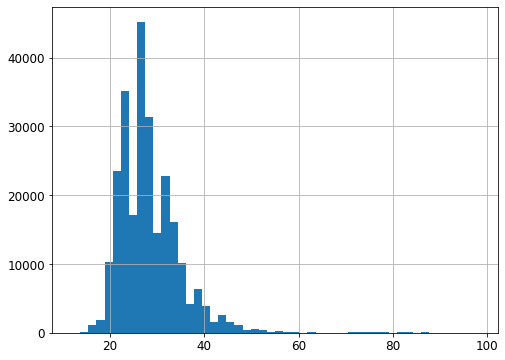

--- Correlations ---------------------


BMI                     1.000000
GenHlth                 0.239185
Diabetes_012            0.224379
HighBP                  0.213748
DiffWalk                0.197078
PhysHlth                0.121141
HighChol                0.106722
MentHlth                0.085310
NoDocbcCost             0.058206
HeartDiseaseorAttack    0.052904
Sex                     0.042950
CholCheck               0.034495
Stroke                  0.020153
Smoker                  0.013804
AnyHealthcare          -0.018471
Age                    -0.036618
HvyAlcoholConsump      -0.048736
Veggies                -0.062275
Fruits                 -0.087518
Income                 -0.100069
Education              -0.103932
PhysActivity           -0.147294
Name: BMI, dtype: float64

In [4]:
# Your Code Starts Here

#print( all_data.info() ) #데이터 컬럼별 건수, type등 표시
#print( all_data.head() ) #데이터 앞쪽 5개 row 데이터 표시
#print( all_data.describe() ) #데이터 count, mean, std, min, 25%,50%,75%, max 값 표시
#print( all_data["BMI"].value_counts() )
#print( all_data["BMI"].describe() ) #BMI 데이터 count, mean, std, min, 25%,50%,75%, max 값 표시
all_data["BMI"].hist(bins=50, figsize=(8,6)) # bins는 막대 구간 수량 (막대의 영역을 얼마나 채울지 결정됨), figsize는 가로,세로 크기 지정
#all_data.hist(bins=50, figsize=(20,15)) # 전체 feature 에 대해 histogram 표시 - bins값, figsize값은 교재 참고함
plt.show()

print("--- Correlations ---------------------")
corr_matrix = all_data.corr() # 상관관계 계산
corr_matrix["BMI"].sort_values(ascending=False) # BMI 상관관계 찾아보기
#all_data.plot(kind="scatter", x="BMI", y="Diabetes_012", alpha=0.1)
# Your Code Ends Here

### Task 2: Missing data imputation (4pts)

1. impute_data_zero: Replace NaN values of "missing_data" into 0 (1 pts).
2. imput_data_mean : Replace NaN values of "missing_data" into feature-wise mean of "impute_data_zero" (3pts).

In [ ]:
# Your Code Starts Here

In [5]:
# 1. impute_data_zero: Replace NaN values of "missing_data" into 0 

print("'missing_data' contain NaN values ?",np.any(np.isnan(missing_data) ) ) # NaN 값 있는지 확인
missing_data_df1 = pd.DataFrame(missing_data).copy() # num array를 DataFrame으로 변환 -> fillna() 를 사용하여 0 으로 치환하기 위함

print(missing_data_df1.info()) #데이터 컬럼별 count, type등 표시
#print(missing_data_df1.head()) #데이터 앞쪽 5개 row 데이터 표시
#print(missing_data_df1.describe()) #데이터 count, mean, std, min, 25%,50%,75%, max 값 표시
print("'missing_data_df1' contain NaN values ?",np.any(np.isnan(missing_data_df1) ) ) # NaN값 있는지 확인
print("-----------------------------------------------")

# DataFrame 의 fillna() 활용하여 NaN값을 0으로 변환
missing_data_df1.fillna(0,inplace=True) # NaN값을 0 으로 채움
impute_data_zero = missing_data_df1.copy()
print(impute_data_zero.info()) #데이터 컬럼별 건수, type등 표시
print("'impute_data_zero' contain NaN values ?",np.any(np.isnan(impute_data_zero) ) ) # NaN값 있는지 다시 확인
print("-----------------------------------------------")

'missing_data' contain NaN values ? True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       253637 non-null  float64
 1   1       253636 non-null  float64
 2   2       253637 non-null  float64
 3   3       253621 non-null  float64
 4   4       253635 non-null  float64
 5   5       253641 non-null  float64
 6   6       253634 non-null  float64
 7   7       253624 non-null  float64
 8   8       253634 non-null  float64
 9   9       253630 non-null  float64
 10  10      253634 non-null  float64
 11  11      253647 non-null  float64
 12  12      253643 non-null  float64
 13  13      253638 non-null  float64
 14  14      253632 non-null  float64
 15  15      253646 non-null  float64
 16  16      253623 non-null  float64
 17  17      253648 non-null  float64
 18  18      253630 non-null  float64
 19  19      253632 non-null  float64
 20  20     

In [8]:
# 2. imput_data_mean : Replace NaN values of "missing_data" into feature-wise mean of "impute_data_zero"

# impute_data_mean 처리 방법1 : DataFrame fillna() 활용
missing_data_df2 = pd.DataFrame(missing_data).copy()
print( missing_data_df2.info() ) #데이터 컬럼별 건수, type등 표시
#print( missing_data_df2.head() ) #데이터 앞쪽 5개 row 데이터 표시
#print( missing_data_df2.describe() ) #데이터 count, mean, std, min, 25%,50%,75%, max 값 표시
#print(missing_data_df2)
print("'missing_data_df2' contain NaN values ?",np.any(np.isnan(missing_data_df2) ) ) # NaN값 있는지 확인
print("-----------------------------------------------")

missing_data_df2.fillna( impute_data_zero.mean() ,inplace=True) # NaN값을 열의 평균(mean)값으로 채움
impute_data_mean = missing_data_df2.copy()

print( impute_data_mean.info() ) #데이터 컬럼별 건수, type등 표시
print( impute_data_mean.describe() ) #데이터 count, mean, std, min, 25%,50%,75%, max 값 표시
print("'impute_data_mean' contain NaN values ?",np.any(np.isnan(impute_data_mean) ) ) # NaN값 있는지 다시 확인
print("-----------------------------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       253637 non-null  float64
 1   1       253636 non-null  float64
 2   2       253637 non-null  float64
 3   3       253621 non-null  float64
 4   4       253635 non-null  float64
 5   5       253641 non-null  float64
 6   6       253634 non-null  float64
 7   7       253624 non-null  float64
 8   8       253634 non-null  float64
 9   9       253630 non-null  float64
 10  10      253634 non-null  float64
 11  11      253647 non-null  float64
 12  12      253643 non-null  float64
 13  13      253638 non-null  float64
 14  14      253632 non-null  float64
 15  15      253646 non-null  float64
 16  16      253623 non-null  float64
 17  17      253648 non-null  float64
 18  18      253630 non-null  float64
 19  19      253632 non-null  float64
 20  20      253628 non-null  float64
 21  21      25

In [70]:
# 2. imput_data_mean : Replace NaN values of "missing_data" into feature-wise mean of "impute_data_zero"

# impute_data_mean 처리 방법2 : SimpleImputer 활용 (강의 교재 참조)
from sklearn.impute import SimpleImputer # library  import
imputer = SimpleImputer(strategy="mean") # 정책 평균 mean 셋팅,  중간값은 median 셋팅
imputer.fit(impute_data_zero) # fit the imputer, 데이터 impute_data_zero 를 사용
#print( imputer.statistics_ ) # 정책에 대한 결과 저장값 출력
print("----- before ------------------------------------------")
missing_data_df3 = pd.DataFrame(missing_data).copy() # NaN 값이 있는 missing_data를 복사하여 사용
print( missing_data_df3.info() ) #데이터 컬럼별 건수, type등 표시
xx = imputer.transform(missing_data_df3) # 데이터의 NaN값을 치환, num arrary 리턴
impute_data_mean2 = pd.DataFrame(xx) # num arrary -> DataFrame로 변환

print("----- after ------------------------------------------")
print( impute_data_mean2.info() ) #데이터 컬럼별 건수, type등 표시
#print( impute_data_mean2.describe() ) #데이터 count, mean, std, min, 25%,50%,75%, max 값 표시
print("'impute_data_mean2' contain NaN values ?",np.any(np.isnan(impute_data_mean2) ) ) # NaN값 있는지 다시 확인
print("-----------------------------------------------")

----- before ------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       253637 non-null  float64
 1   1       253636 non-null  float64
 2   2       253637 non-null  float64
 3   3       253621 non-null  float64
 4   4       253635 non-null  float64
 5   5       253641 non-null  float64
 6   6       253634 non-null  float64
 7   7       253624 non-null  float64
 8   8       253634 non-null  float64
 9   9       253630 non-null  float64
 10  10      253634 non-null  float64
 11  11      253647 non-null  float64
 12  12      253643 non-null  float64
 13  13      253638 non-null  float64
 14  14      253632 non-null  float64
 15  15      253646 non-null  float64
 16  16      253623 non-null  float64
 17  17      253648 non-null  float64
 18  18      253630 non-null  float64
 19  19      253632 non-null  float

In [71]:
# Your Code Ends Here

## DO NOT EDIT THIS CODE ###
print("impute_data_zero nan values?:", np.any(np.isnan(impute_data_zero)))
print("impute_data_mean nan values?:", np.any(np.isnan(impute_data_mean)))
## DO NOT EDIT THIS CODE ###

impute_data_zero nan values?: False
impute_data_mean nan values?: False


### Task 3: Split "all_data" into three sets: train_data, valid_data, test_data (4pts).

Specification:

1. Test size should be 20% of all samples (1pts).
1. Validation size should be 2,944 samples (1pts).
1. The rest of the samples should belong to the train dataset (1pts).
1. Create train_label, valid_label, test_label from "Diabetes_012" feature (0.5pts).
1. Drop "Diabetes_012" feature from each data set (0.5pts).


In [ ]:
# Your Code Starts Here

In [11]:
# 1.Test size should be 20% of all samples

from sklearn.model_selection import train_test_split # sklearn에서 제공하는 데이터 분리 모듈 사용
train_valid_tmp, test_data = train_test_split(all_data, test_size=0.2, random_state=42) # test_size는 비율 또는 정수값, random_state값은 random seed 생성시 항상 동일한 shuffle index 허용
#print( train_valid_tmp.info() ) #데이터 컬럼별 건수, type등 표시
#print( train_valid_tmp.head() ) #데이터 앞쪽 5개 row 데이터 표시
#print( train_valid_tmp.describe() ) #데이터 count, mean, std, min, 25%,50%,75%, max 값 표시
print( "train_valid_tmp.shape=",train_valid_tmp.shape )
#print( test_data.info() ) #데이터 컬럼별 건수, type등 표시
#print( test_data.head() ) #데이터 앞쪽 5개 row 데이터 표시
#print( test_data.describe() ) #데이터 count, mean, std, min, 25%,50%,75%, max 값 표시
print( "test_data.shape=",test_data.shape )


train_valid_tmp.shape= (202944, 22)
test_data.shape= (50736, 22)


In [12]:
# 2.Validation size should be 2,944 samples
# 3.The rest of the samples should belong to the train dataset

train_data, valid_data = train_test_split(train_valid_tmp, test_size=2944, random_state=42) # test_size는 비율 또는 정수값, random_state값은 random seed 생성시 항상 동일한 shuffle index 허용
#print( train_data.info() ) #데이터 컬럼별 건수, type등 표시
#print( train_data.head() ) #데이터 앞쪽 5개 row 데이터 표시
#print( train_data.describe() ) #데이터 count, mean, std, min, 25%,50%,75%, max 값 표시
print( "train_data.shape=",train_data.shape )
#print( valid_data.info() ) #데이터 컬럼별 건수, type등 표시
#print( valid_data.head() ) #데이터 앞쪽 5개 row 데이터 표시
#print( valid_data.describe() ) #데이터 count, mean, std, min, 25%,50%,75%, max 값 표시
print( "valid_data.shape=",valid_data.shape )  

train_data.shape= (200000, 22)
valid_data.shape= (2944, 22)


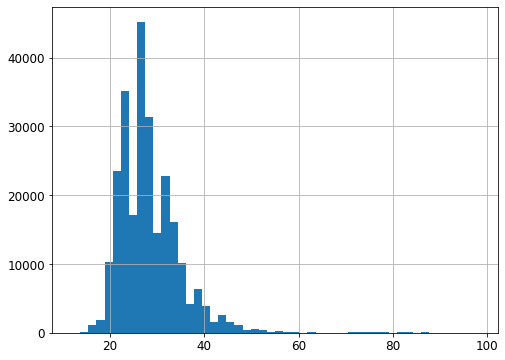

In [13]:
# 1.Test size should be 20% of all samples

# BMI 분포를 고려하여 데이터를 나누기 위해 분석
all_data["BMI"].hist(bins=50, figsize=(8,6)) #BMI 분포 확인

         BMI BMI_cut
0       40.0      35
1       25.0      20
2       28.0      25
3       27.0      25
4       24.0      20
...      ...     ...
253675  45.0      40
253676  18.0      15
253677  28.0      25
253678  23.0      20
253679  25.0      20

[253680 rows x 2 columns]
25    0.359413
20    0.298817
30    0.175233
35    0.068377
15    0.052121
40    0.026254
45    0.010423
50    0.008574
10    0.000788
0     0.000000
5     0.000000
Name: BMI_cut, dtype: float64


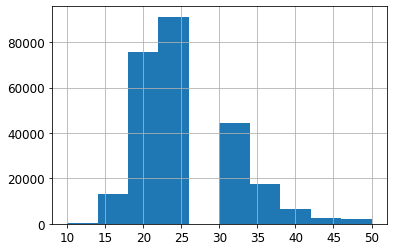

In [14]:
# all_data 를 나눌때 BMI 분포를 고려하기 위해 BMI_cut 범주 그룹값 추가
all_data["BMI_cut"] = pd.cut(all_data["BMI"], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, np.inf], labels=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50] ) #BMI값을 구간별로 나눠서 범주값 매핑, np.inf는 무한대 의미
all_data["BMI_cut"].hist() #그래프 표시
print(all_data[["BMI","BMI_cut"]]) # 맵핑된 정보 확인 BMI -> BMI_cut
#print(all_data[all_data["BMI"] > 50.0 ] ) # BMI값이 50보다 큰것들 표시
print( all_data["BMI_cut"].value_counts() / len(all_data) ) #  all_data 내에 BMI_cut 분포 비율 확인

In [24]:
# StratifiedShuffleSplit 를 활용하여 데이터 나누기 (각 구간별, 범주별 데이터 나누기)
from sklearn.model_selection import StratifiedShuffleSplit  # 필요한 lib

split1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) # train/test 1개로 분할, test_size 비율지정, 재현가능성을 위해 난수 초기값 지정
for train_valid_index, test_index in split1.split( all_data, all_data["BMI_cut"] ): # all_data를 BMI_cut 고려하여 데이터 나누기
	train_valid_tmp = all_data.iloc[train_valid_index].copy() # train 임시 데이터 -> 아래쪽에서 다시 train, valid 데이터로 나눔
	test_data = all_data.iloc[test_index].copy() # test 데이터

print(train_valid_tmp["BMI_cut"].value_counts() / len(train_valid_tmp)) #train_valid_tmp 내에 BMI_cut 분포 비율 확인
print(test_data["BMI_cut"].value_counts() / len(test_data)) #test_data 내에 BMI_cut 분포 비율 확인
#print(train_valid_tmp.info()) #데이터 컬럼별 건수, type등 표시
#print(train_valid_tmp.head()) #데이터 앞쪽 5개 row 데이터 표시
#print(train_valid_tmp.describe()) #데이터 count, mean, std, min, 25%,50%,75%, max 값 표시


25    0.359414
20    0.298816
30    0.175231
35    0.068378
15    0.052123
40    0.026254
45    0.010422
50    0.008574
10    0.000788
0     0.000000
5     0.000000
Name: BMI_cut, dtype: float64
25    0.359409
20    0.298821
30    0.175240
35    0.068374
15    0.052113
40    0.026254
45    0.010427
50    0.008574
10    0.000788
0     0.000000
5     0.000000
Name: BMI_cut, dtype: float64


In [25]:
# 2.Validation size should be 2,944 samples
# 3.The rest of the samples should belong to the train dataset

# 위 에서 만들어진 train_valid_tmp 데이터를 다시 train, valid 로 나누기
split2 = StratifiedShuffleSplit(n_splits=1, test_size=2944, random_state=42) #valid 데이터 2944개 생성, 나머지 train 데이터
for train_index, valid_index in split2.split( train_valid_tmp, train_valid_tmp["BMI_cut"] ): # train_tmp를 BMI_cut 고려하여 데이터 나누기
	train_data = train_valid_tmp.iloc[train_index].copy() # train 데이터
	valid_data = train_valid_tmp.iloc[valid_index].copy() # test 데이터

print(train_data["BMI_cut"].value_counts() / len(train_data)) # train_data 내에 BMI_cut 분포 비율 확인
print(valid_data["BMI_cut"].value_counts() / len(valid_data)) # valid_data 내에 BMI_cut 분포 비율 확인

25    0.359415
20    0.298815
30    0.175230
35    0.068380
15    0.052120
40    0.026255
45    0.010420
50    0.008575
10    0.000790
0     0.000000
5     0.000000
Name: BMI_cut, dtype: float64
25    0.359375
20    0.298913
30    0.175272
35    0.068274
15    0.052310
40    0.026155
45    0.010530
50    0.008492
10    0.000679
0     0.000000
5     0.000000
Name: BMI_cut, dtype: float64


In [26]:
# 데이터 나누기 위해 추가된 BMI_cut 삭제
for set_ in (train_valid_tmp, train_data, valid_data , test_data):
	set_.drop("BMI_cut", axis=1, inplace=True)

In [27]:
# 데이터 shape 확인
print( "test_data.shape=",test_data.shape )
print( "valid_data.shape=",valid_data.shape )
print( "train_data.shape=",train_data.shape )
print("My Test data size correct:", test_data.shape==(all_data_size*.2, 22))
print("My Valid data size correct:", valid_data.shape==(2944,22))
print("My Train data size correct:", train_data.shape==(all_data_size-len(test_data)-len(valid_data),22))

test_data.shape= (50736, 22)
valid_data.shape= (2944, 22)
train_data.shape= (200000, 22)
My Test data size correct: True
My Valid data size correct: True
My Train data size correct: True


In [28]:
# 4.Create train_label, valid_label, test_label from "Diabetes_012" feature
train_label = train_data["Diabetes_012"].copy() # train_data 로 부터 "Diabetes_012" 복사
valid_label = valid_data["Diabetes_012"].copy() # valid_data 로 부터 "Diabetes_012" 복사
test_label = test_data["Diabetes_012"].copy() # test_data 로 부터 "Diabetes_012" 복사

# train_label 데이터 확인
print( train_label.value_counts() ) # 값 별로 건수 표시
print( train_label ) # 전체 데이터 확인
#print( train_label.describe() ) #데이터 count, mean, std, min, 25%,50%,75%, max 값 표시

0.0    168534
2.0     27833
1.0      3633
Name: Diabetes_012, dtype: int64
170207    0.0
18255     0.0
97666     0.0
167428    0.0
157820    0.0
         ... 
116941    2.0
72383     2.0
103045    0.0
162715    0.0
193123    0.0
Name: Diabetes_012, Length: 200000, dtype: float64


In [29]:
# 5.Drop "Diabetes_012" feature from each data set

test_data.drop("Diabetes_012", axis=1, inplace=True) # test_data 에 있는 Diabetes_012 컬럼 삭제
valid_data.drop("Diabetes_012", axis=1, inplace=True) # valid_data 에 있는 Diabetes_012 컬럼 삭제
train_data.drop("Diabetes_012", axis=1, inplace=True) # train_data 에 있는 Diabetes_012 컬럼 삭제

print( "test_data.shape=",test_data.shape )
print( "valid_data.shape=",valid_data.shape )
print( "train_data.shape=",train_data.shape )

test_data.shape= (50736, 21)
valid_data.shape= (2944, 21)
train_data.shape= (200000, 21)


In [30]:
# Your Code Ends Here

## DO NOT EDIT THIS CODE ###
print("Test data size correct:", test_data.shape==(all_data_size*.2, 21))
print("Valid data size correct:", valid_data.shape==(2944,21))
print("Train data size correct:", train_data.shape==(all_data_size-len(test_data)-len(valid_data),21))

print("Test label size correct:", test_label.shape==(all_data_size*.2,))
print("Valid label size correct:", valid_label.shape==(2944,))
print("Train label size correct:", train_label.shape==(all_data_size-len(test_data)-len(valid_data),))
## DO NOT EDIT THIS CODE ###

Test data size correct: True
Valid data size correct: True
Train data size correct: True
Test label size correct: True
Valid label size correct: True
Train label size correct: True


### Task 4: Preprocess train, valid, test datasets (4pts)

1. Replace values of 2 into 1 in labels (i.e., multi-class to binary-class)(1pts)
2. MinMax scale features into 0~1 (e.g., use MinMaxScaler) (3pts)

In [ ]:
# Your Code Starts Here

In [31]:
# 1.Replace values of 2 into 1 in labels (i.e., multi-class to binary-class)

print( "-- before -------------")
print( test_label.value_counts() ) # 값 별로 건수 표시
print( valid_label.value_counts() ) # 값 별로 건수 표시
print( train_label.value_counts() ) # 값 별로 건수 표시

test_label.replace(2,1, inplace=True) # test_label 값 2 --> 1 로 변경
valid_label.replace(2,1, inplace=True) # valid_label 값 2 --> 1 로 변경
train_label.replace(2,1, inplace=True) # train_label 값 2 --> 1 로 변경
print( "-- after -------------" )
print( test_label.value_counts() ) # 값 별로 건수 표시
print( valid_label.value_counts() ) # 값 별로 건수 표시
print( train_label.value_counts() ) # 값 별로 건수 표시

-- before -------------
0.0    42700
2.0     7096
1.0      940
Name: Diabetes_012, dtype: int64
0.0    2469
2.0     417
1.0      58
Name: Diabetes_012, dtype: int64
0.0    168534
2.0     27833
1.0      3633
Name: Diabetes_012, dtype: int64
-- after -------------
0.0    42700
1.0     8036
Name: Diabetes_012, dtype: int64
0.0    2469
1.0     475
Name: Diabetes_012, dtype: int64
0.0    168534
1.0     31466
Name: Diabetes_012, dtype: int64


In [74]:
# 2. MinMax scale features into 0~1 (e.g., use MinMaxScaler)

from sklearn.preprocessing import MinMaxScaler # 필요한 library import

scaler1 = MinMaxScaler() # 객체 생성 : train_data용
scaler1.fit(train_data) # 피팅 : 스케일링에 사용할 최소,최대 값 계산하여 저장
train_data_scaled = scaler1.transform(train_data) # 데이터 변환, 결과는 배열로 반환됨
train_data = np.round(train_data_scaled,4) # 결과값들을 소수점 4째자리까지 반올림 (불필요값 제거)

scaler2 = MinMaxScaler() # 객체 생성 : valid_data용
scaler2.fit(valid_data) # 피팅 : 스케일링에 사용할 최소,최대 값 계산하여 저장
valid_data_scaled = scaler2.transform(valid_data) # 데이터 변환, 결과는 배열로 반환됨
valid_data = np.round(valid_data_scaled,4) # 결과값들을 소수점 4째자리까지 반올림 (불필요값 제거)

scaler3 = MinMaxScaler() # 객체 생성 : test_data용
scaler3.fit(test_data) # 피팅 : 스케일링에 사용할 최소,최대 값 계산하여 저장
test_data_scaled = scaler3.transform(test_data) # 데이터 변환, 결과는 배열로 반환됨
test_data = np.round(test_data_scaled,4) # 결과값들을 소수점 4째자리까지 반올림 (불필요값 제거)

print("My Train data range correct:", np.max(train_data) == 1. and np.min(train_data)==0.)
print("My Valid data range correct:", np.max(valid_data) == 1. and np.min(valid_data)==0.)
print("My Test data range correct:", np.max(test_data) == 1. and np.min(test_data)==0.)

My Train data range correct: True
My Valid data range correct: True
My Test data range correct: True


In [75]:
# Your Code Ends Here

## DO NOT EDIT THIS CODE ###
print("Train data range correct:", np.max(train_data) == 1. and np.min(train_data)==0.)
print("Valid data range correct:", np.max(valid_data) == 1. and np.min(valid_data)==0.)
print("Test data range correct:", np.max(test_data) == 1. and np.min(test_data)==0.)

print("Train label correct:", np.unique(train_label)==(0,1))
print("Valid label correct:", np.unique(valid_label)==(0,1))
print("Test label correct:", np.unique(test_label)==(0,1))
## DO NOT EDIT THIS CODE ###

Train data range correct: True
Valid data range correct: True
Test data range correct: True
Train label correct: [ True  True]
Valid label correct: [ True  True]
Test label correct: [ True  True]


### Task 5: Train a model (9pt)

1. Train a model of your choice (4pt)
2. Validate your model on valid_data (1pt)
3. Improve the validation score by finetuning (3pt)
4. Save your model (1pt)

In [ ]:
# Your Code Starts Here

In [88]:
# 1. Train a model of your choice

# 랜덤 포레스트 모델 선택 : 강의 자료 참고함
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 모델
forest_reg = RandomForestRegressor() # 객체 생성 ,  n_estimators=100
forest_reg.fit(train_data, train_label) # 모델 피팅
predict_train_label = forest_reg.predict(train_data) # 예측 

# 평가를 위해 RMSE : 루트 평균 제곱 오차, MSE : 평균 제곱 오차
from sklearn.metrics import mean_squared_error 
forest_reg_mse = mean_squared_error(train_label, predict_train_label) #MSE 측정
forest_reg_rmse = np.sqrt(forest_reg_mse) # RMSE 측정
print("forest_reg mean_squared_error:", forest_reg_rmse)

forest_reg mean_squared_error: 0.1383863450755946


In [114]:
print(train_data.shape)
print("---------------")
print(train_label.shape)
print("---------------")
print(predict_train_label.shape)

(200000, 21)
---------------
(200000,)
---------------
(200000,)


In [89]:
forest_reg.score(train_data, train_label)

0.8555500475723584

In [90]:
forest_reg.score(valid_data, valid_label)

0.09449825504488008

In [91]:
forest_reg.score(test_data, test_label)

0.12784057257086512

In [82]:
from sklearn.model_selection import cross_val_score # 교차검증(Cross-Validation)  library import
# 훈련 세트 10개 fold , 10개의 평가 점수가 담긴 배열 리턴, scoring 매개변수에 평균 제곱 오차(MSE)의 반댓값(즉, 음숫값)을 계산하는 neg_mean_squared_error 함수 사용 
scores = cross_val_score(forest_reg, train_data, train_label, scoring="neg_mean_squared_error", cv=10)
forest_reg_rmse_score = np.sqrt(-scores) # 제곱근을 계산하기 전에 -scores로 부호를 바꿔서 계산

def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())
display_scores(forest_reg_rmse_score)

Scores: [0.3439165  0.34542281 0.34596766 0.34016512 0.34311687 0.34517101
 0.34209951 0.34065726 0.34121263 0.34626572]
Mean: 0.3433995081786746
Standard deviation: 0.00216433169437325


In [ ]:
# 4.Save your model
from sklearn.externals import joblib
joblib.dump(forest_reg, "my_forest_reg.pkl") # 모델 저장
#my_forest_reg = joblib.load("my_forest_reg.pkl") # 저장한 모델 로딩

In [ ]:
# Your Code Ends Here

### Task 6: Evaluate your model (5pt)

1. Load your model (1pt)
2. Show that the loaded model's prediction is same as the model in Task 5 using valid_data (3pt)
2. Evaluate your model on test_data (1pt)

In [ ]:
# Your Code Starts Here

In [ ]:

#my_forest_reg = joblib.load("my_forest_reg.pkl") # 저장한 모델 로딩


In [ ]:
# Your Code Ends Here